Q-Learning Algorithm

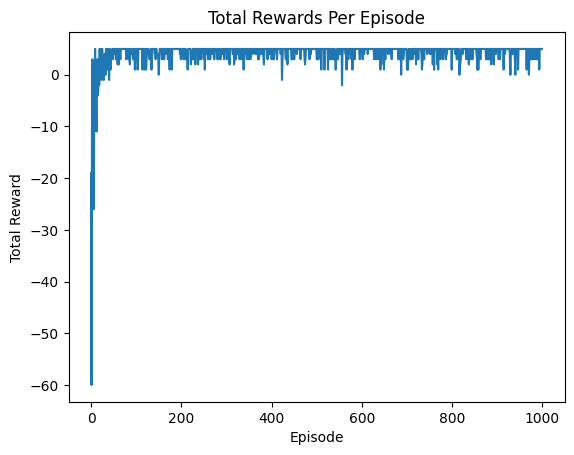

State (0, 0): [0.20677841 1.09613692 0.44903696 1.8098    ]
State (0, 1): [0.70902581 3.122      0.39349174 0.36897422]
State (0, 2): [-0.61356002  3.01979214 -0.78642463 -0.74830896]
State (0, 3): [-0.3940399   0.05851449 -0.40998969 -0.3940399 ]
State (1, 0): [-1.26857271  3.05064936 -1.09376078 -0.11098632]
State (1, 1): [1.58403562 4.58       0.92004811 2.93734235]
State (1, 2): [-0.40912947 -0.35371    -0.45163767  5.86235491]
State (1, 3): [-0.29701     7.90905838  0.09008433  0.66646681]
State (2, 0): [-0.32024517 -0.45716003  0.39997108  4.57583938]
State (2, 1): [2.9327511  6.2        2.42005008 5.1586459 ]
State (2, 2): [-0.2071      7.96234116  0.3599      1.41501602]
State (2, 3): [0.88096624 9.98689979 0.14060904 1.451075  ]
State (3, 0): [-0.41713462 -0.4900995  -0.4900995   5.83150569]
State (3, 1): [4.41208733 5.97666833 3.27966664 8.        ]
State (3, 2): [ 5.53427544  7.21295982  5.63499181 10.        ]
State (3, 3): [0. 0. 0. 0.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
